In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
from ggplot import *

F:\Programs\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
# загружаем файл с данными
df = pd.read_csv("linear-model.csv")
df[:10]

,x1,x2,x3,y
0,17.486288,185.505167,0.0,161.600365
1,32.353509,182.540139,0.0,157.077034
2,20.629644,190.742210,0.0,155.571362
3,29.396574,169.742980,0.0,147.232886
4,19.673511,191.574909,0.0,149.530893
5,15.556438,155.332122,0.0,146.833537
6,26.156556,164.948770,0.0,142.106386
7,33.093134,183.057357,0.0,152.470491
8,19.682189,167.404882,0.0,151.519127
9,21.003913,142.630078,0.0,136.560387


In [3]:
# x - таблица с исходными данными факторов (x1, x2, x3)
x = df.iloc[:,:-1]  # срез по всем строкам и всем столбцам, кроме последнего
# y - таблица с исходными данными зависимой переменной
y = df.iloc[:,-1]  # только последний столбец

## Визуализация данных

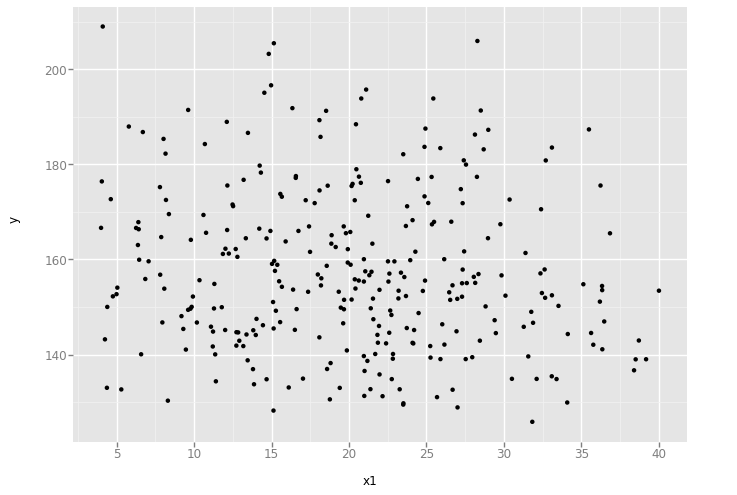

<ggplot: (-9223371865050007997)>

In [4]:
ggplot(aes(x="x1", y="y"), data=df) + geom_point()

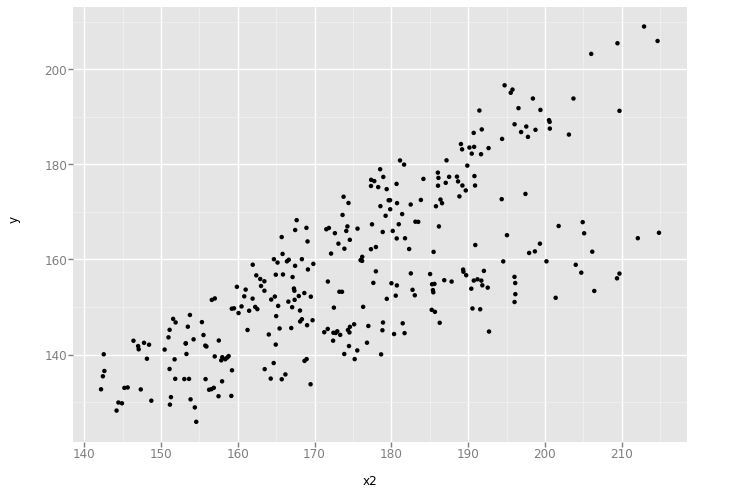

<ggplot: (-9223371865050007990)>

In [5]:
ggplot(aes(x="x2", y="y"), data=df) + geom_point()

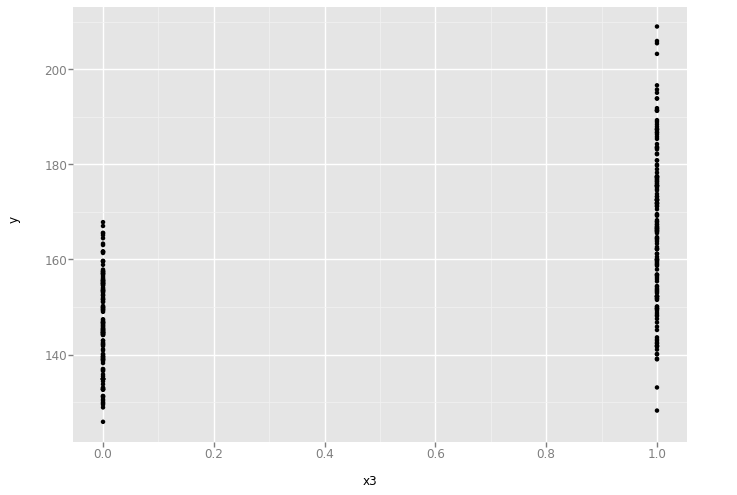

<ggplot: (171804821992)>

In [6]:
ggplot(aes(x="x3", y="y"), data=df) + geom_point()

Признак x3 является бинарным

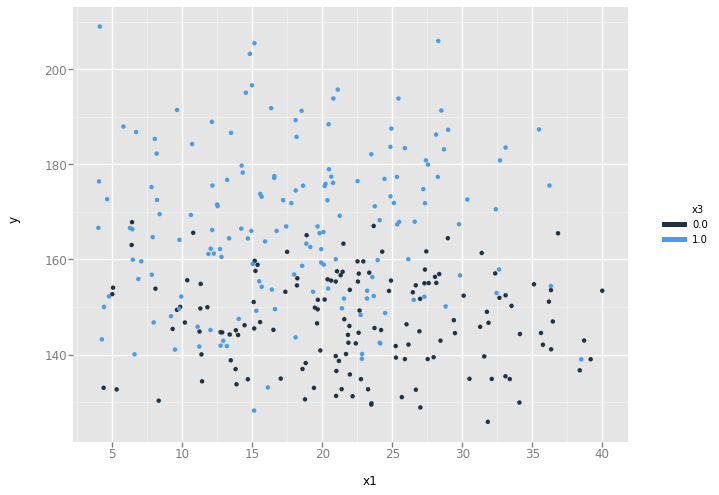

<ggplot: (171804874795)>

In [7]:
ggplot(aes(x="x1", y="y", color="x3"), data=df) + geom_point()

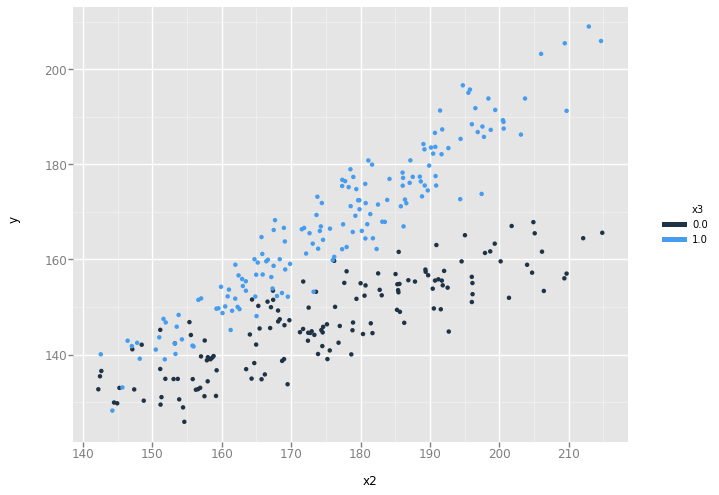

<ggplot: (-9223371865049869936)>

In [8]:
ggplot(aes(x="x2", y="y",color="x3"), data=df) + geom_point()

## Построение линейной регрессии разными средствами

In [9]:
# scikit-learn
# создаем пустую модель
skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(x, y)
# и выведем параметры рассчитанной модели
print(skm.intercept_, skm.coef_)

20.215535404300425 [ 0.07461561  0.71544973 19.46500514]


In [18]:
skm.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [10]:
# statsmodels
# добавим фиктивную переменную для расчета intercept - параметра b0
x_ = sm.add_constant(x)
# создаем модель для метода обычных наименьших квадратов (Ordinary Least Squares)
smm = sm.OLS(y, x_)
# запускаем расчет модели
res = smm.fit()
b = res.params.values
# теперь выведем параметры рассчитанной модели
# array([ 20.2155354 ,   0.07461561,   0.71544973,  19.46500514])
print(res.params)
print(b[0], b[2], b[3])
b

const    20.215535
x1        0.074616
x2        0.715450
x3       19.465005
dtype: float64
20.21553540430022 0.7154497266192987 19.465005142264708


array([20.2155354 ,  0.07461561,  0.71544973, 19.46500514])

In [11]:
# statsmodels с помощью формулы
# создаем модель на основе формулы
smm = sm.OLS.from_formula("y ~ x1 + x2 + x3", data=df)
# запускаем расчет модели
res = smm.fit()
# теперь выведем параметры рассчитанной модели
print(res.params)

AssertionError: 

In [12]:
# patsy + numpy
# создаем матрицу факторов и результатов из формулы и исходного датафрейма
pt_y, pt_x = pt.dmatrices("y ~ x1 + x2 + x3", df)
# вызываем стандартную numpy'вскую процедуру оптимизации по МНК
# кстати, именно ее и вызывает LinearRegression из scikit-learn для неразреженной матрицы с исходными данными
# а для разреженной вызывается scipy.sparse.linalg.lsqr
res = np.linalg.lstsq(pt_x, pt_y)
# достаем коэффициенты модели
b = res[0].ravel()
print(b)

AssertionError: 

## Отображение модели

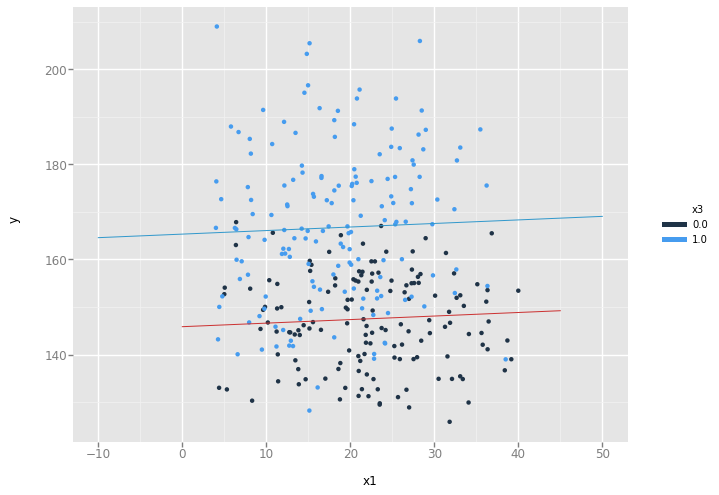

<ggplot: (-9223371865049312028)>

In [13]:
# calculate intercept for both lines: x3=0 and x3=1
b0w = b[0] + df["x2"].mean() * b[2] 
b0m = b[0] + df["x2"].mean() * b[2] + b[3] 

gg = ggplot(aes(x="x1",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w, slope=b[1], color="#CC3333")
gg += geom_abline(intercept=b0m, slope=b[1], color="#3399CC")
gg

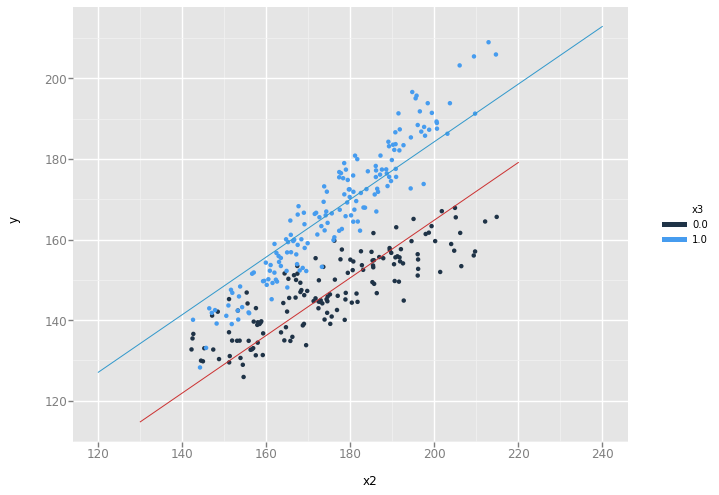

<ggplot: (-9223371865049837091)>

In [14]:
b0w = b[0] + df["x1"].mean() * b[1] 
b0m = b[0] + df["x1"].mean() * b[1] + b[3]

gg = ggplot(aes(x="x2",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w, slope=b[2], color="#CC3333")
gg += geom_abline(intercept=b0m, slope=b[2], color="#3399CC")
gg

## Добавление фактора x2*x3

In [15]:
x["x4"] = x["x2"] * x["x3"] 
skm = lm.LinearRegression()
skm.fit(x, y)
skm.intercept_, skm.coef_

(62.989293874793375,
 array([ 1.99115993e-02,  4.77769299e-01, -6.82173181e+01,  4.97960890e-01]))

In [16]:
x["x4"] = x["x2"] * x["x3"] 
x_ = sm.add_constant(x)
smm = sm.OLS(y, x_)
res = smm.fit()
b2 = res.params.values
b2

array([ 6.29892939e+01,  1.99115993e-02,  4.77769299e-01, -6.82173181e+01,
        4.97960890e-01])

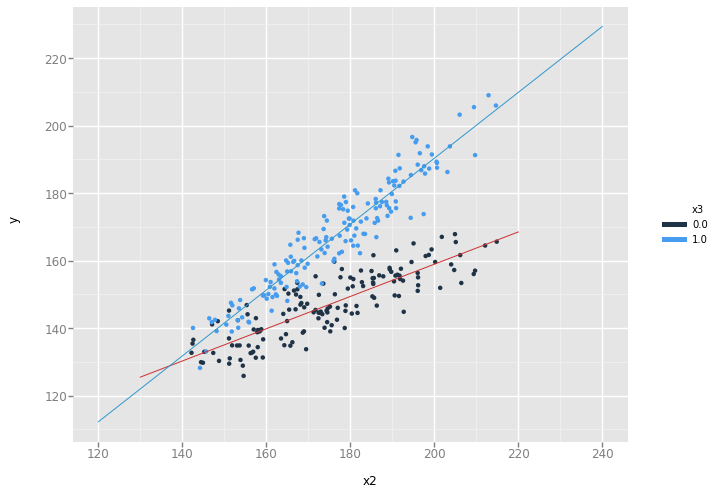

<ggplot: (-9223371865049289854)>

In [17]:
b0w2 = b2[0] + df["x1"].mean() * b2[1] 
b0m2 = b2[0] + df["x1"].mean() * b2[1] + b2[3]

gg = ggplot(aes(x="x2",y="y",color="x3"),data=df) + geom_point()
gg += geom_abline(intercept=b0w2, slope=b2[2], color="#CC3333")
gg += geom_abline(intercept=b0m2, slope=b2[2]+b2[4], color="#3399CC")
gg